In [70]:
from eis.EISDataIO import eis_dataframe_from_csv, ECM_from_raw_strings
from eis.EISPlot import plot_eis

import numpy as np
import pandas as pd
from scipy import interpolate
import random

import matplotlib.colors as colors
import matplotlib.cbook as cbook

from IPython.display import display

from os import path
import logging

In [2]:
pd.options.display.max_columns = None

In [3]:
# loading training data

# if you are on a windows machine un-comment the following line to get the path to training data
# here = !echo %cd%

# if you are on a mac/ unix machine un-comment the following line to get the path to training data
here = !pwd

train_data_path = path.join(path.dirname(here[0]), "train_data.csv")
eis_data = eis_dataframe_from_csv(train_data_path)

In [4]:
def complex_parts(cmp: pd.Series) -> tuple[pd.Series, pd.Series]:
    real_part= cmp.apply(np.real)
    imag_part= cmp.apply(np.imag)
    return (real_part, imag_part)

eis_data["Z_real"], eis_data["Z_imag"] = complex_parts(eis_data.Z)
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,..."
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -..."
...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483..."
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630..."
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39..."
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05, -9.03818659..."


In [5]:
from typing import Set
from itertools import chain

def freq_set(cmp: pd.Series) -> Set:
    result = set(chain.from_iterable(cmp))
    
    return result

len(freq_set(eis_data.freq))



2146

In [6]:
def freq_cat_choi(freq_array):
    bins = [
        0.01,
        10,
        10_000,
        100_000,
        2_000_000
    ]
    res=np.digitize(freq_array, bins, right=False)
    return res
    

In [7]:
def drange(cmp: pd.Series) -> tuple[pd.Series, pd.Series]:
    min_= cmp.apply(np.min)
    max_= cmp.apply(np.max)
    return (min_, max_)

eis_data["freq_min"], eis_data["freq_max"] = drange(eis_data.freq)
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310
...,...,...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",10.00,100000.000
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",10.00,1000000.000
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",1.00,1995262.310
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05, -9.03818659...",0.01,100000.000


In [8]:
eis_data["Z_real_min"], eis_data["Z_real_max"] = drange(eis_data.Z_real)
eis_data["Z_imag_min"], eis_data["Z_imag_max"] = drange(eis_data.Z_imag)

display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310,17.754399,405.073552,-120.693060,-0.014951
...,...,...,...,...,...,...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",10.00,100000.000,72.555800,4953.312258,-4814.611388,-48.358524
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",10.00,1000000.000,952.937485,73538.510002,-25026.297801,-1347.863875
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",1.00,1995262.310,5.685886,82.109315,-51.129822,-0.082206
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05, -9.03818659...",0.01,100000.000,6.077507,32.377402,-12.515715,-0.000052


In [9]:
def minmaxer(cmp: pd.Series, min_, max_) -> pd.Series:
    minmaxed = (cmp-min_)/(max_-min_)
    return minmaxed

Z_real_min = eis_data["Z_real_min"].min()
Z_real_max = eis_data["Z_real_max"].max()
Z_imag_min = eis_data["Z_imag_min"].min()
Z_imag_max = eis_data["Z_imag_max"].max()
eis_data["Z_real_minmaxed"] = minmaxer(eis_data.Z_real,Z_real_min,Z_real_max)
eis_data["Z_imag_minmaxed"] = minmaxer(eis_data.Z_imag,Z_imag_min,Z_imag_max)
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196,"[0.0024010756884318006, 0.002387371182141883, ...","[0.9964493638297757, 0.9964559871114435, 0.996..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215,"[0.0024122970939710123, 0.002412250150980291, ...","[0.9965537084667062, 0.9965536249749967, 0.996..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264,"[0.003297436482895553, 0.003294743257612999, 0...","[0.9964999392686594, 0.99649075164539, 0.99648..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851,"[0.0026020394734222194, 0.0026020394125999763,...","[0.9965542909902029, 0.9965542894765899, 0.996..."
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310,17.754399,405.073552,-120.693060,-0.014951,"[0.0024318938251909356, 0.002431893032586322, ...","[0.9965542855438289, 0.9965542823135225, 0.996..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...","[-4814.61138816, -4165.41666719, -3601.4380483...",10.00,100000.000,72.555800,4953.312258,-4814.611388,-48.358524,"[0.003903508245800251, 0.003682224685933619, 0...","[0.9933170610547427, 0.9937535647319029, 0.994..."
7458,"[10.0, 12.6485522, 15.9985872, 20.2358965, 25....","[(73538.51000223-1776.24017654j), (73413.60429...",L-R-RCPE-RCPE-RCPE,"L1: 1.05e-08, R1: 2.81e+01, R2: 6.40e+01, CPE1...","[73538.51000223, 73413.60429656, 73304.9395675...","[-1776.24017654, -1592.10621049, -1461.6962630...",10.00,1000000.000,952.937485,73538.510002,-25026.297801,-1347.863875,"[0.02609472831582521, 0.026054314201793743, 0....","[0.9953599923411647, 0.9954837998070524, 0.995..."
7459,"[1.0, 1.34453288, 1.80776868, 2.43060443, 3.26...","[(82.1093149-51.12982215j), (72.40330299-47.29...",RCPE-RCPE-RCPE,"R1: 4.78e+00, R2: 8.77e-01, R3: 2.85e+02, CPE1...","[82.1093149, 72.40330299, 63.66501847, 55.8809...","[-51.12982215, -47.29789889, -43.31241432, -39...",1.00,1995262.310,5.685886,82.109315,-51.129822,-0.082206,"[0.002327396489029139, 0.0023242560410406555, ...","[0.9965199170738753, 0.9965224935714031, 0.996..."
7460,"[0.01, 0.0134051824, 0.0179698915, 0.024088967...","[(32.37740171-5.15196774e-05j), (32.37740063-6...",RCPE-RCPE,"R1: 5.65e+00, R2: 2.67e+01, CPE1_t: 9.21e-01, ...","[32.37740171, 32.37740063, 32.3773992, 32.3773...","[-5.15196774e-05, -6.82381469e-05,

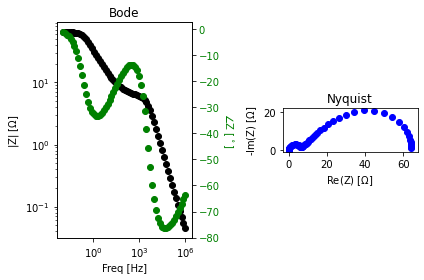

In [10]:
# plot data w/o circuit model
sample = eis_data.loc[eis_data.Circuit == "RC-G-G"].iloc[1]
frequencies = sample.freq
impedances = sample.Z
plot_eis(frequencies, impedances)

R1: 4.76e+01, C1: 3.61e-07, R_g1: 2.03e-05, t_g1: 2.97e-02, R_g2: 4.51e+00, t_g2: 5.41e+01


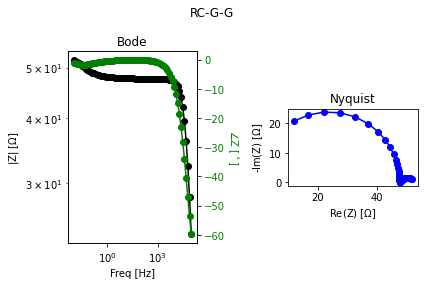

In [11]:
# plot data w/ circuit model
sample = eis_data.loc[eis_data.Circuit == "RC-G-G"].iloc[0]
frequencies = sample.freq
impedances = sample.Z
print(sample.Parameters)
circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit)

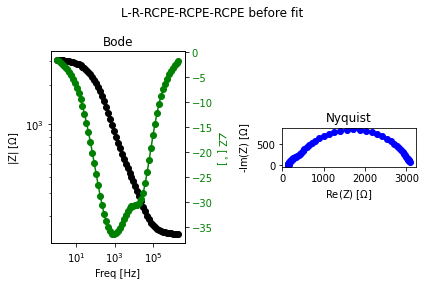

[('L1', 3.35e-08), ('R1', 69.5), ('R2', 74.9), ('CPE1_C', 4.62e-12), ('CPE1_t', 0.607), ('R3', 137.0), ('CPE2_C', 8.54e-07), ('CPE2_t', 0.943), ('R4', 2840.0), ('CPE3_C', 1.16e-05), ('CPE3_t', 0.692)]
[('L1', 0, inf), ('R1', 0, inf), ('R2', 0, inf), ('CPE1_C', 0, inf), ('CPE1_t', 0, 10), ('R3', 0, inf), ('CPE2_C', 0, inf), ('CPE2_t', 0, 10), ('R4', 0, inf), ('CPE3_C', 0, inf), ('CPE3_t', 0, 10)]


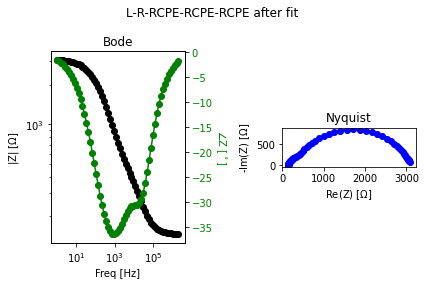

[('L1', 3.350116561085915e-08), ('R1', 69.5), ('R2', 74.9), ('CPE1_C', 1.7957971926724131e-10), ('CPE1_t', 0.607), ('R3', 137.0), ('CPE2_C', 8.551790186556203e-07), ('CPE2_t', 0.9430000000000681), ('R4', 2840.0), ('CPE3_C', 1.1612215531136277e-05), ('CPE3_t', 0.6920000000111881)]


In [12]:
# Demonstrate Optimizing a circuit model
sample = eis_data.loc[2, :]
frequencies = sample.freq
impedances = sample.Z
circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " before fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])
print([x for x in zip(circuit.param_names, circuit.param_fitting_bounds[0], circuit.param_fitting_bounds[1])])
circuit.fit(frequencies, impedances)
plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit + " after fit")
print([x for x in zip(circuit.param_names, circuit.param_values)])


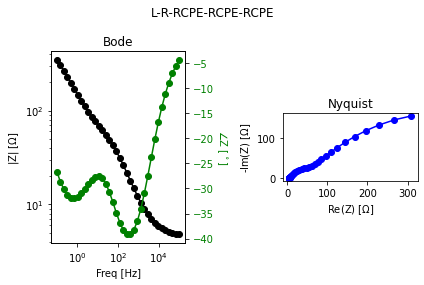

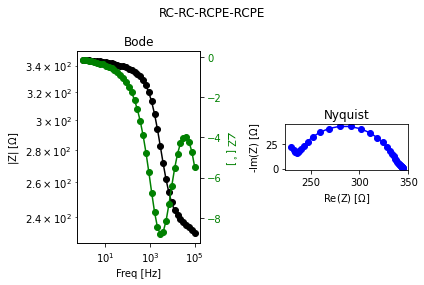

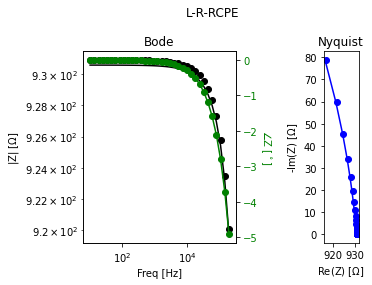

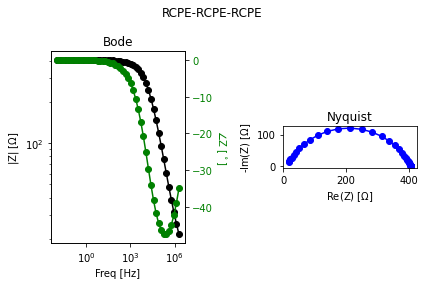

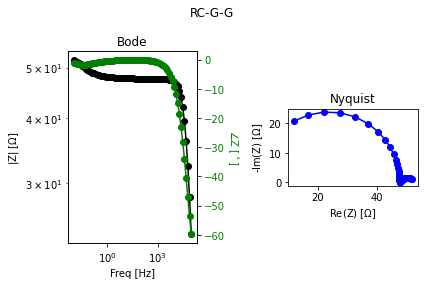

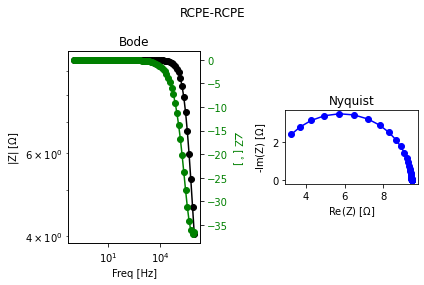

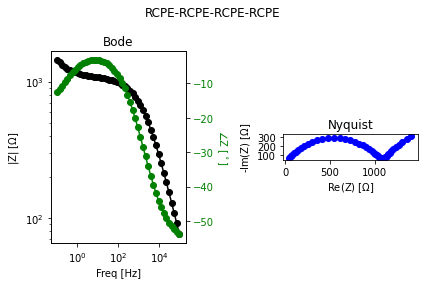

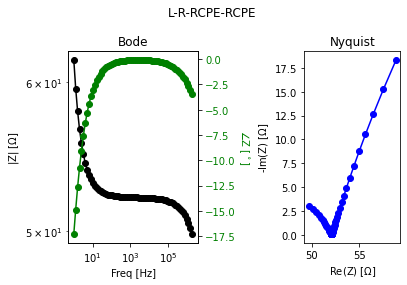

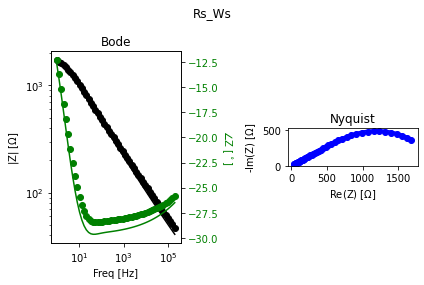

In [13]:
# Plot first example of each circuit type with the circuit model
for circuit_name in eis_data.Circuit.unique():
    try:
        sample = eis_data.loc[eis_data.Circuit == circuit_name].iloc[0]
        frequencies = sample.freq
        impedances = sample.Z
        circuit = ECM_from_raw_strings(sample.Circuit, sample.Parameters)
        plot_eis(frequencies, impedances, ECM=circuit, title=sample.Circuit)
    except:
        logging.exception(f"unable to simulate circuit: {circuit_name}")

In [14]:
display(eis_data.groupby(["freq_min", "freq_max"]).count())

freq    Z  Circuit  Parameters  Z_real  Z_imag  \
freq_min freq_max                                                      
0.01     100000.000    453  453      453         453     453     453   
         199526.231    466  466      466         466     466     466   
         1000000.000   449  449      449         449     449     449   
         1995262.310   448  448      448         448     448     448   
0.10     100000.000    488  488      488         488     488     488   
         199526.231    469  469      469         469     469     469   
         1000000.000   472  472      472         472     472     472   
         1995262.310   462  462      462         462     462     462   
1.00     100000.000    462  462      462         462     462     462   
         199526.231    462  462      462         462     462     462   
         1000000.000   485  485      485         485     485     485   
         1995262.310   485  485      485         485     485     485   
10.00    100000.000    479  479      479         479     479     479   
         199526.231    439  439      439         439     439     439   
         1000000.000   453  453      453         453     453     453   
         1995262.310   490  490      490         490     490     490   

                      Z_real_min  Z_real_max  Z_imag_min  Z_imag_max  \
freq_min freq_max                                                      
0.01     100000.000          453         453         453         453   
         199526.231          466         466         466         466   
         1000000.000         449         449         449         449   
         1995262.310         448         448         448         448   
0.10     100000.000          488         488         488         488   
         199526.231          469         469         469         469   
         1000000.000         472         472         472         472   
         1995262.310         462         462         462         462   
1.00     100000.000          462         462         462         462   
         199526.231          462         462         462         462   
         1000000.000         485         485         485         485   
         1995262.310         485         485         485         485   
10.00    100000.000          479         479         479         479   
         199526.231          439         439         439         439   
         1000000.000         453         453         453         453   
         1995262.310         490         490         490         490   

                      Z_real_minmaxed  Z_imag_minmaxed  
freq_min freq_max                                       
0.01     100000.000               453              453  
         199526.231               466              466  
         1000000.000              449              449  
         1995262.310              448              448  
0.10     100000.000               488              488  
         199526.231               469              469  
         1000000.000              472              472  
         1995262.310              462              462  
1.00     100000.000               462              462  
         199526.231               462              462  
         1000000.000              485              485  
         1995262.310              485              485  
10.00    100000.000               479              479  
         199526.231               439              439  
         1000000.000              453              453  
         1995262.310              490              490

In [15]:
# summary_cols=[min, max, len, np.std]
# freq_summary_cols=[]
# impedance_summary_cols=[]
# for s in summary_cols:
#     eis_data[f"freq_{s.__name__}"]=eis_data.freq.apply(s)
#     freq_summary_cols.append(f"freq_{s.__name__}")
#     eis_data[f"Z_real_{s.__name__}"]=eis_data.Z_real.apply(s)
#     eis_data[f"Z_imag_{s.__name__}"]=eis_data.Z_imag.apply(s)
#     impedance_summary_cols.append(f"Z_real_{s.__name__}")
#     impedance_summary_cols.append(f"Z_imag_{s.__name__}")

    

# display(eis_data[freq_summary_cols+impedance_summary_cols])
# display(eis_data[freq_summary_cols+impedance_summary_cols+["Circuit"]].groupby("Circuit").agg(["mean", "min", "max", "median", "std"]))

In [16]:
import matplotlib.pyplot as plt
from sklearn import preprocessing


def plot_eis_nyquist(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 9, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(3, 3, squeeze=False, sharex=True, sharey=True)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        impedance: np.ndarray[Any, np.dtype[np.complex_]] = s.Z
        a.plot(np.real(impedance), -np.imag(impedance), "bo")
        a.set_aspect("equal")
        a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()




In [17]:


def plot_eis_nyquist_minmaxed_local_global_freq(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 9, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(3, 3, squeeze=False, sharex=True, sharey=True)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        impedance: np.ndarray[Any, np.dtype[np.complex_]] = s.Z
        freq_minmaxed= (freq-s.freq_min)/(s.freq_max-s.freq_min)
        real=np.real(impedance)
        imag=np.imag(impedance)
        real_minmaxed = (real-np.min(real))/(np.max(real)-np.min(real))
        imag_minmaxed = (imag-np.min(imag))/(np.max(imag)-np.min(imag))
        a.scatter(real_minmaxed, -imag_minmaxed,c=freq_minmaxed, cmap="viridis",norm=colors.LogNorm(vmin=s.freq_min, vmax=s.freq_max))
        a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()




In [18]:
def plot_eis_nyquist_minmaxed_local_local_freq(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 16, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(4, 4, squeeze=False, sharex=True, sharey=True)
    myplots=[]
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        impedance: np.ndarray[Any, np.dtype[np.complex_]] = s.Z
        # freq_minmaxed= (freq-np.min(freq))/(np.max(freq)-np.min(freq))
        real=np.real(impedance)
        imag=np.imag(impedance)
        real_minmaxed = (real-np.min(real))/(np.max(real)-np.min(real))
        imag_minmaxed = (imag-np.min(imag))/(np.max(imag)-np.min(imag))
        a.scatter(real_minmaxed, -imag_minmaxed,c=freq, cmap="viridis",norm=colors.LogNorm(vmin=s.freq_min, vmax=s.freq_max))
        a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()


In [19]:
def plot_eis_nyquist_local_freq(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 16, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(4, 4, squeeze=False, sharex=False, sharey=False)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        impedance: np.ndarray[Any, np.dtype[np.complex_]] = s.Z
        # freq_minmaxed= (freq-np.min(freq))/(np.max(freq)-np.min(freq))
        real=np.real(impedance)
        imag=np.imag(impedance)
        real_minmaxed = real
        imag_minmaxed = imag
        a.scatter(real_minmaxed, -imag_minmaxed,c=freq_cat_choi(freq), cmap="viridis")
        # a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.yticks(color="g")
    plt.show()

In [20]:

def plot_eis_nyquist_minmaxed_global(
    samples: pd.DataFrame,
    circuit_name: str,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    assert len(samples) == 9, "samples must be a 9-row dataframe"
    fig, ax = plt.subplots(3, 3, squeeze=False, sharex=True, sharey=True)
    myplots=[]
    
    
    for a, tup in zip(ax.flat, samples.iterrows()):
        idx, s = tup
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.freq
        a.scatter(s.Z_real_minmaxed, -s.Z_imag_minmaxed, c=freq, cmap="viridis")
        a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

    fig.tight_layout()
    fig.suptitle(circuit_name)
    plt.axis("equal")
    plt.yticks(color="g")
    plt.show()




In [21]:
def plotcolor(n, t):
    
    
    plt.scatter(t[0], t[1])
    #plt.
    
    plt.tight_layout()
    plt.yticks(color="g")
    #plt.show()

In [22]:
def plot_eis_nyquist_minmaxed_local_local_freq_individual(
    samples: pd.DataFrame,
):
    """ Creates a single figure w/ both Bode and Nyquist plots of a single EIS spectrum.
    Plots the results of a simulated circuit as well if provided

    Args:
        frequency (np.ndarray[Any, np.dtype[np.float_]]): numpy array of frequency values. Real, positive numbers
        impedance (np.ndarray[Any, np.dtype[np.complex_]]): numpy array of impedance values. Imaginary numbers
        title (Optional[str]): A figure title. Defaults to None.
        ECM (Optional[Circuit]) A Equivalent Circuit Model. Defaults to None.
    """
    i = 0

    
    myplots=[]
    
    for idx, s in samples.iterrows():
        
        plt.figure()
    
        fig = plt.figure(figsize=(4,4), dpi=56)
        #fig.set_size_inches((1,1))

        ax = plt.Axes(fig, [0, 0, 1, 1])
        #ax.set_axis_off()
        fig.add_axes(ax)
    
        freq: np.ndarray[Any, np.dtype[np.real_]] = s.Freq

        # freq_minmaxed= (freq-np.min(freq))/(np.max(freq)-np.min(freq))
        real=s.Z_real
        imag=s.Z_imag
        real_minmaxed = (real-np.min(real))/(np.max(real)-np.min(real))
        imag_minmaxed = (imag-np.min(imag))/(np.max(imag)-np.min(imag))
        plt.scatter(real_minmaxed, -imag_minmaxed,c=freq, cmap="viridis",norm=colors.LogNorm(vmin=0.01, vmax=1995262.310))
        #a.set_aspect("equal")
        # a.title(f"freq: [{np.min(freq)}, {np.max(freq)}]")
        # a.set_xlabel(r"Re(Z) [$\Omega$]")
        # a.set_ylabel(r"-Im(Z) [$\Omega$]")

        #fig.tight_layout()

        #fig.suptitle(circuit_name)
        #plt.yticks(color="g")
        plt.axis("off")
      
        
        plt.savefig(f'./{s.Circuit}/fig{i}', dpi=56)
        plt.show()
        i += 1

In [23]:
tplot = []
for n,g in eis_data.groupby("Circuit"):
    #print(g.iloc[0])
    for r in range(g.shape[0]):
        
        tplot.append((n, g.iloc[r][4], g.iloc[r][5], g.iloc[r][0]))
    

#for n, t1, t2, t3 in tplot:
    
#    plot_eis_nyquist_minmaxed_local_local_freq_individual(n, t)

In [24]:
df = pd.DataFrame(tplot, columns=["Circuit", "Z_real", "Z_imag", "Freq"])
df = df

In [25]:
path_img = []
for key, values in df["Circuit"].iteritems():
    #print(key, values)
    path_img.append(f'./{values}/fig{key}.png')

df["Path"] = path_img
df

,Circuit,Z_real,Z_imag,Freq,Path
0,L-R-RCPE,"[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...","[10.0, 13.4990445, 18.2224203, 24.5985264, 33....",./L-R-RCPE/fig0.png
1,L-R-RCPE,"[12.55661892, 12.5566189, 12.55661886, 12.5566...","[-6.42565014e-07, -7.9179738e-07, -9.75663312e...","[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...",./L-R-RCPE/fig1.png
2,L-R-RCPE,"[1030.20465408, 1030.19839001, 1030.19074115, ...","[-0.02860932, -0.03493322, -0.04265478, -0.052...","[10.0, 14.8735211, 22.1221629, 32.9034456, 48....",./L-R-RCPE/fig2.png
3,L-R-RCPE,"[1.83862947, 1.83862907, 1.83862848, 1.8386276...","[-2.86924817e-05, -4.21997537e-05, -6.20656945...","[0.01, 0.0148160252, 0.0219514602, 0.032523338...",./L-R-RCPE/fig3.png
4,L-R-RCPE,"[1487.24622928, 1487.24397893, 1487.24092704, ...","[-0.357186539, -0.479394669, -0.643414531, -0....","[1.0, 1.34669204, 1.81357945, 2.442333, 3.2890...",./L-R-RCPE/fig4.png
...,...,...,...,...,...
7457,Rs_Ws,"[11.80919812, 11.80597208, 11.79569214, 11.770...","[-0.10092657, -0.14146089, -0.19736569, -0.272...","[10.0, 13.4990445, 18.2224203, 24.5985264, 33....",./Rs_Ws/fig7457.png
7458,Rs_Ws,"[31.14046893, 31.14046902, 31.14046915, 31.140...","[-1.20046546e-07, -1.90166755e-07, -3.0124501e...","[0.01, 0.0134298195, 0.0180360052, 0.024222029...",./Rs_Ws/fig7458.png
7459,Rs_Ws,"[0.85335524, 0.85104391, 0.84808738, 0.8442910...","[-0.01925092, -0.02379579, -0.0293546, -0.0361...","[0.1, 0.134051824, 0.179698915, 0.240889673, 0...",./Rs_Ws/fig7459.png
7460,Rs_Ws,"[5.83468643, 5.80653837, 5.7813456, 5.75860172...","[-0.21185801, -0.19400729, -0.17763282, -0.162...","[10.0, 12.6451235, 15.989915, 20.219445, 25.56...",./Rs_Ws/fig7460.png


In [26]:
#plot_eis_nyquist_minmaxed_local_local_freq_individual(df)

In [27]:
eis_data["freq"].shape

(7462,)

In [28]:
eis_data["Circuit"].value_counts()

RCPE-RCPE-RCPE-RCPE    924
RCPE-RCPE-RCPE         919
RC-RC-RCPE-RCPE        907
L-R-RCPE-RCPE          900
RC-G-G                 890
L-R-RCPE-RCPE-RCPE     876
L-R-RCPE               865
RCPE-RCPE              855
Rs_Ws                  326
Name: Circuit, dtype: int64

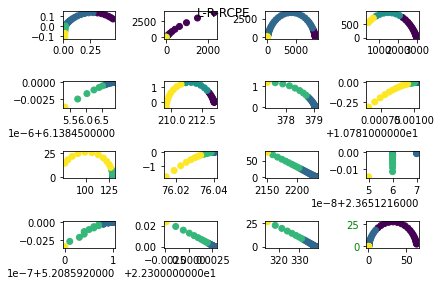

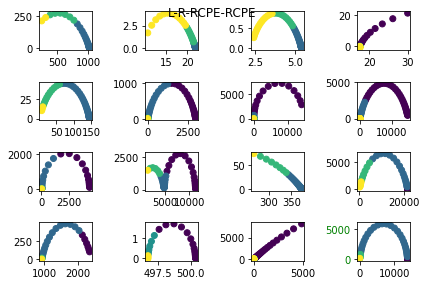

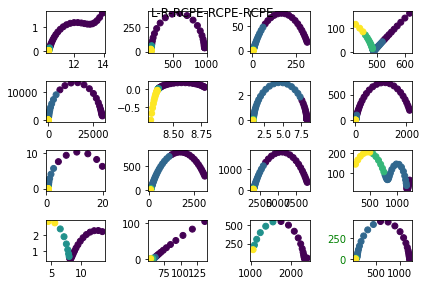

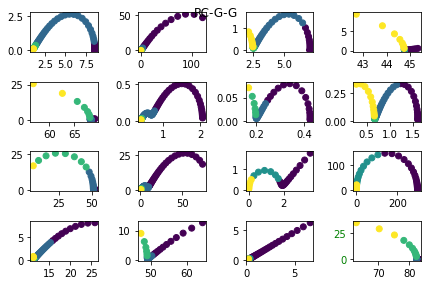

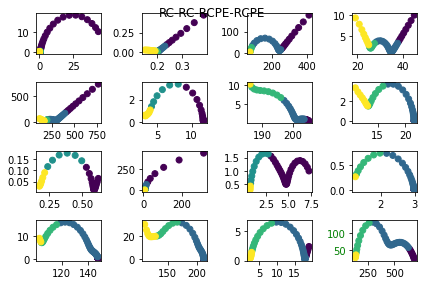

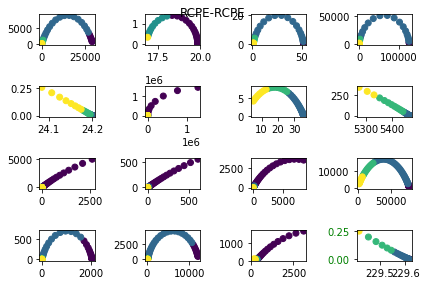

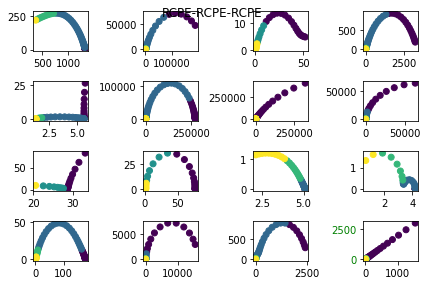

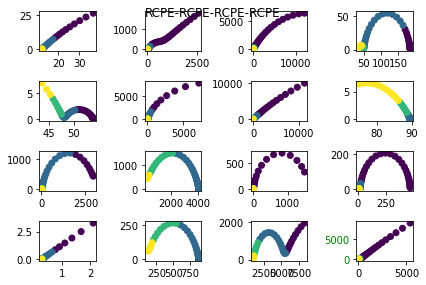

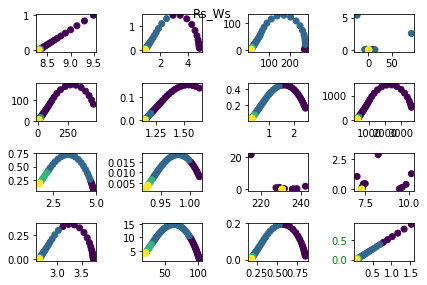

In [29]:
for n,g in eis_data.groupby("Circuit"):
    sample = g.sample(16)
    plot_eis_nyquist_local_freq(sample, n)

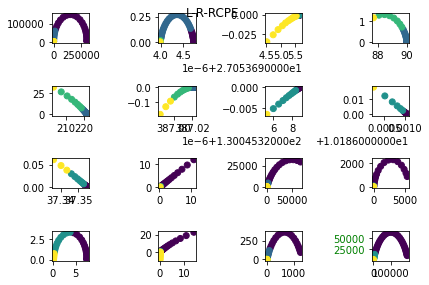

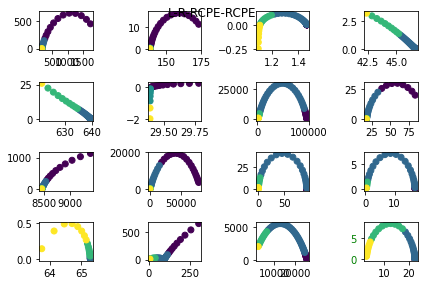

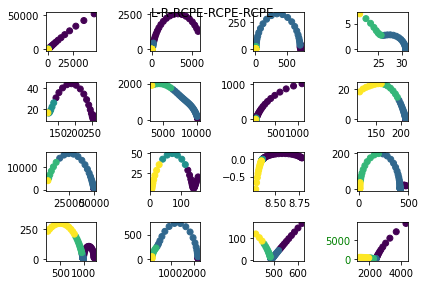

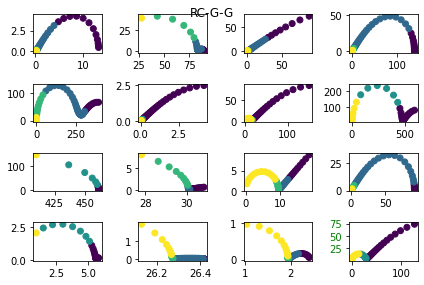

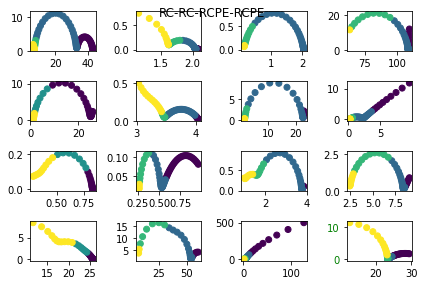

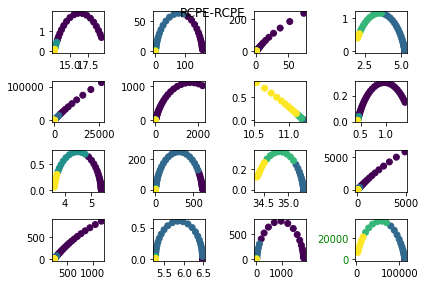

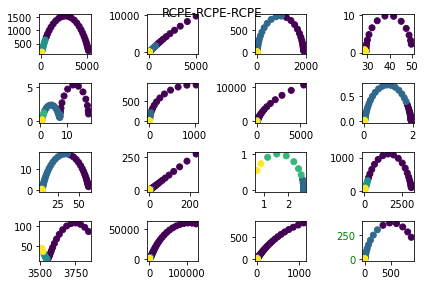

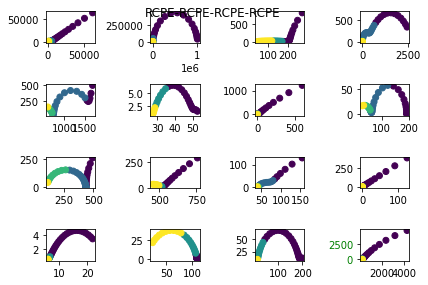

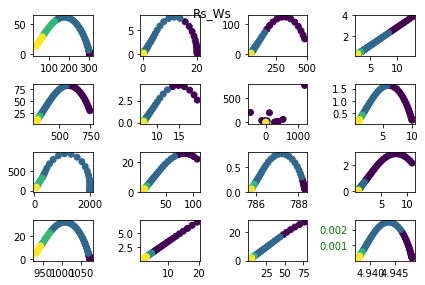

In [30]:
for n,g in eis_data.groupby("Circuit"):
    sample = g.sample(16)
    plot_eis_nyquist_local_freq(sample, n)

In [31]:
def extract_freq_z_data(samples: pd.DataFrame) -> pd.DataFrame:
    frequencies = np.array([]) ; z_reals = np.array([]); z_imags = np.array([])
    for idx, s in samples.iterrows():
    
        freq = s.freq_interpolation
        z_real = s.Z_real_values
        z_imag = s.Z_real_values
        
        frequencies = np.concatenate((frequencies, freq), axis=None)
        z_reals = np.concatenate((z_reals, z_real), axis=None)
        z_imags = np.concatenate((z_imags, z_imag), axis=None)

        
    frame = { 'Freq_interpolation': frequencies, 'Z_real_values': z_reals, 'Z_imag_values': z_imags }
    all_data = pd.DataFrame(frame)
    
    return all_data

In [32]:
from typing import Callable
def get_interpolating_function(x: np.ndarray, y: np.ndarray) -> Callable:
    assert len(x) == len(y)
    # Obtain functions for interpolation
    interp = interpolate.interp1d(x, y) #, assume_sorted = True)
    return interp

def eval_func(x: np.ndarray, func: Callable) -> np.ndarray:
    return func(x)

In [33]:
freq_interpolation = np.logspace(1.0, 5.0, num=100, base=10.0)
eis_data["freq_interpolation"] = None
eis_data["freq_interpolation"] = eis_data["freq_interpolation"].apply(lambda x: freq_interpolation)

print(eis_data.freq_interpolation)
cols = []
for i in ["Z_real", "Z_imag"]:
    inter_p_col = f'{i}_interp'
    eis_data[inter_p_col] = eis_data.apply(lambda x: get_interpolating_function(x.freq, x[i]), axis=1)
    values_col = f'{i}_values'
    eis_data[values_col] = eis_data.apply(lambda x: eval_func(x.freq_interpolation, x[inter_p_col]), axis=1)
    cols.extend([inter_p_col, values_col])


display(eis_data[cols].sample(2))

# eis_data.apply(interp_individual, args=(freq_vector))

0       [10.0, 10.974987654930562, 12.045035402587823,...
1       [10.0, 10.974987654930562, 12.045035402587823,...
2       [10.0, 10.974987654930562, 12.045035402587823,...
3       [10.0, 10.974987654930562, 12.045035402587823,...
4       [10.0, 10.974987654930562, 12.045035402587823,...
                              ...                        
7457    [10.0, 10.974987654930562, 12.045035402587823,...
7458    [10.0, 10.974987654930562, 12.045035402587823,...
7459    [10.0, 10.974987654930562, 12.045035402587823,...
7460    [10.0, 10.974987654930562, 12.045035402587823,...
7461    [10.0, 10.974987654930562, 12.045035402587823,...
Name: freq_interpolation, Length: 7462, dtype: object


,Z_real_interp,Z_real_values,Z_imag_interp,Z_imag_values
6601,<scipy.interpolate._interpolate.interp1d objec...,"[156.5373190128201, 146.44370010931686, 138.97...",<scipy.interpolate._interpolate.interp1d objec...,"[-254.15366131702558, -235.44785284874922, -22..."
4665,<scipy.interpolate._interpolate.interp1d objec...,"[216.51093300428616, 185.2301924678205, 164.46...",<scipy.interpolate._interpolate.interp1d objec...,"[-858.0356801036652, -785.5113093490625, -728...."


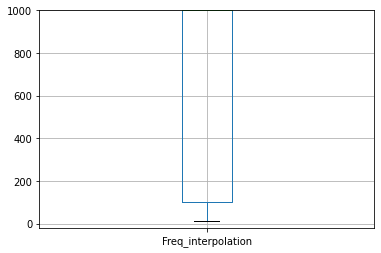

In [34]:
axes = extract_freq_z_data(eis_data).boxplot(column=['Freq_interpolation'],return_type='axes')
axes.set_ylim(-20, 1000)

plt.show()

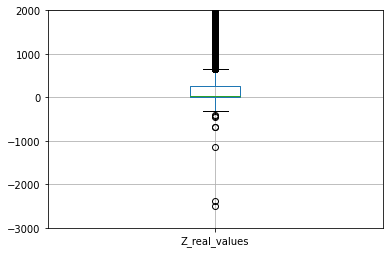

In [35]:
axes2 = extract_freq_z_data(eis_data).boxplot(column=['Z_real_values'],return_type='axes')
axes2.set_ylim(-3000, 2000)

plt.show()

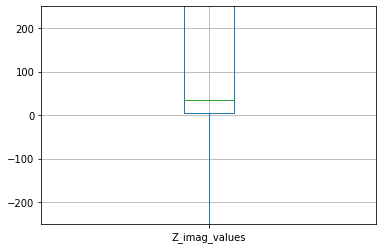

In [36]:
axes3 = extract_freq_z_data(eis_data).boxplot(column=['Z_imag_values'])
axes3.set_ylim(-250, 250)

plt.show()

In [37]:
extract_freq_z_data(eis_data)



,Freq_interpolation,Z_real_values,Z_imag_values
0,10.000000,63.764380,63.764380
1,10.974988,61.925398,61.925398
2,12.045035,60.354235,60.354235
3,13.219411,58.961178,58.961178
4,14.508288,57.432300,57.432300
...,...,...,...
746195,68926.121043,0.247375,0.247375
746196,75646.332755,0.233072,0.233072
746197,83021.756813,0.217374,0.217374
746198,91116.275612,0.200146,0.200146


In [38]:
extract_freq_z_data(eis_data).describe()


,Freq_interpolation,Z_real_values,Z_imag_values
count,746200.000000,7.462000e+05,7.462000e+05
mean,11255.514467,2.598143e+03,2.598143e+03
std,21501.234813,3.377379e+04,3.377379e+04
min,10.000000,-6.410312e+03,-6.410312e+03
25%,100.079910,4.183052e+00,4.183052e+00
50%,1001.082105,3.494646e+01,3.494646e+01
75%,10008.242735,2.659734e+02,2.659734e+02
max,100000.000000,1.931703e+06,1.931703e+06


In [39]:
eis_data

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed,freq_interpolation,Z_real_interp,Z_real_values,Z_imag_interp,Z_imag_values
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196,"[0.0024010756884318006, 0.002387371182141883, ...","[0.9964493638297757, 0.9964559871114435, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[63.764380468258295, 61.92539765791979, 60.354...",<scipy.interpolate._interpolate.interp1d objec...,"[-33.297052858722566, -32.290999171821966, -31..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215,"[0.0024122970939710123, 0.002412250150980291, ...","[0.9965537084667062, 0.9965536249749967, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[342.687444999676, 342.56819878750457, 342.451...",<scipy.interpolate._interpolate.interp1d objec...,"[-2.471435617824892, -2.581873613417865, -2.69..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264,"[0.003297436482895553, 0.003294743257612999, 0...","[0.9964999392686594, 0.99649075164539, 0.99648...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[2878.687101456434, 2860.899522378687, 2841.82...",<scipy.interpolate._interpolate.interp1d objec...,"[-347.6748343957627, -366.32280074381015, -385..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851,"[0.0026020394734222194, 0.0026020394125999763,...","[0.9965542909902029, 0.9965542894765899, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[930.93345951, 930.9334071305063, 930.93334964...",<scipy.interpolate._interpolate.interp1d objec...,"[-0.0068507146, -0.007477980358997113, -0.0081..."
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310,17.754399,405.073552,-120.693060,-0.014951,"[0.0024318938251909356, 0.002431893032586322, ...","[0.9965542855438289, 0.9965542823135225, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[404.1194686723685, 404.0545116437392, 403.983...",<scipy.interpolate._interpolate.interp1d objec...,"[-1.8642287082455433, -1.9885557911031155, -2...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457,"[10.0, 13.4596032, 18.1160919, 24.383541, 32.8...","[(4953.31225754-4814.61138816j), (4269.4031861...",RCPE-RCPE,"R1: 2.47e+01, R2: 2.95e+05, CPE1_t: 9.41e-01, ...","[4953.31225754, 4269.40318615, 3680.28615178, ...",

In [40]:
def extract_IQR(data : pd.Series) -> np.array:
    # First quartile (Q1)
    data = data.to_numpy()
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')  
    # Third quartile (Q3)
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    # Interquaritle range (IQR)
    IQR = Q3 - Q1
    # Upper whisker
    upWhisker = Q3 + (1.5 * IQR)
    # Lower whisker
    loWhisker = Q1 - (1.5 * IQR) 

    return  np.array([loWhisker,upWhisker])

In [41]:
def extract_outliers(samples: pd.DataFrame,limits: np.array) -> tuple:
    list_freq = []; list_z_real = []; list_z_imag = []; 
    for idx, s in samples.iterrows():
        #Extract outliers from each data 
        
        ind_frequencias = (s.freq >= limits[0][0]) & (s.freq <=  limits[0][1])
        frequencies = s.freq[ind_frequencias]; impedance_real = s.Z_real[ind_frequencias]; impedance_imag = s.Z_imag[ind_frequencias]
        
        ind_Z_real = (impedance_real >= limits[1][0]) & (impedance_real <=  limits[1][1])
        frequencies = frequencies[ind_Z_real]; impedance_real = impedance_real[ind_Z_real]; impedance_imag = impedance_imag[ind_Z_real]
        
        
        ind_Z_imag = (impedance_imag >= limits[2][0]) & (impedance_imag <=  limits[2][1])
        frequencies = frequencies[ind_Z_imag]; impedance_real = impedance_real[ind_Z_imag]; impedance_imag = impedance_imag[ind_Z_imag]
        
        
        list_freq.append(frequencies)
        list_z_real.append(impedance_real)
        list_z_imag.append(impedance_imag)
    
    return tuple([list_freq,list_z_real,list_z_imag])

In [42]:

freqLimits = extract_IQR(extract_freq_z_data(eis_data)["Freq_interpolation"])
z_realLimits = extract_IQR(extract_freq_z_data(eis_data)["Z_real_values"])
z_imagLimits = extract_IQR(extract_freq_z_data(eis_data)["Z_imag_values"])

limits = np.array([freqLimits,z_realLimits,z_imagLimits])
print(limits)

/tmp/ipykernel_221/3974402510.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
/tmp/ipykernel_221/3974402510.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data, 75, interpolation = 'midpoint')


[[-15125.06204872  25469.25466371]
 [  -388.50311405    658.65995624]
 [  -388.50311405    658.65995624]]


In [43]:
prueba = extract_outliers(eis_data,limits)
# Data filtered by the inferior limit (Q1 - 1.5 * IQR) and superior limit (Q3 + 1.5 * IQR)
# eis_data["filtered_freq"] = prueba[0]  
eis_data["filtered_Z_real"] = prueba[1]  
eis_data["filtered_Z_imag"] = prueba[2]  
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed,freq_interpolation,Z_real_interp,Z_real_values,Z_imag_interp,Z_imag_values,filtered_Z_real,filtered_Z_imag
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196,"[0.0024010756884318006, 0.002387371182141883, ...","[0.9964493638297757, 0.9964559871114435, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[63.764380468258295, 61.92539765791979, 60.354...",<scipy.interpolate._interpolate.interp1d objec...,"[-33.297052858722566, -32.290999171821966, -31...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215,"[0.0024122970939710123, 0.002412250150980291, ...","[0.9965537084667062, 0.9965536249749967, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[342.687444999676, 342.56819878750457, 342.451...",<scipy.interpolate._interpolate.interp1d objec...,"[-2.471435617824892, -2.581873613417865, -2.69...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264,"[0.003297436482895553, 0.003294743257612999, 0...","[0.9964999392686594, 0.99649075164539, 0.99648...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[2878.687101456434, 2860.899522378687, 2841.82...",<scipy.interpolate._interpolate.interp1d objec...,"[-347.6748343957627, -366.32280074381015, -385...","[536.39582077, 492.97868106, 455.63750884, 423...","[-378.67147027, -337.23696196, -301.09112538, ..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851,"[0.0026020394734222194, 0.0026020394125999763,...","[0.9965542909902029, 0.9965542894765899, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[930.93345951, 930.9334071305063, 930.93334964...",<scipy.interpolate._interpolate.interp1d objec...,"[-0.0068507146, -0.007477980358997113, -0.0081...",[],[]
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310,17.754399,405.073552,-120.693060,-0.014951,"[0.0024318938251909356, 0.002431893032586322, ...","[0.9965542855438289, 0.9965542823135225, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[404.1194686723685, 404.0545116437392, 403.983...",<scipy.interpolate._interpolate.interp1d objec...,"[-1.

In [44]:
def extract_Q1(cmp: pd.Series) -> np.array:
    q1_sample = np.percentile(cmp, 25, interpolation = 'midpoint')
    return q1_sample

In [45]:
def extract_Q3(cmp: pd.Series) -> np.array:
    q3_sample = np.percentile(cmp, 75, interpolation = 'midpoint')
    return q3_sample

In [46]:
def extract_boxplot_data_from_columns(cmp: pd.Series) -> tuple[pd.Series, pd.Series,pd.Series, pd.Series, pd.Series]:
    min_= cmp.apply(np.min)
    max_= cmp.apply(np.max)
    Q1_= cmp.apply(extract_Q1)
    Q3_= cmp.apply(extract_Q3)
    median_data = cmp.apply(np.median)
    return (min_,Q1_,median_data,Q3_,max_)

In [47]:
# Add columns for len of columns filtered_Z_real and filtered_Z_imag
eis_data["len_filtered_Z_real"] = eis_data["filtered_Z_real"].apply(len)
eis_data["len_filtered_Z_imag"] = eis_data["filtered_Z_imag"].apply(len)
display(eis_data)

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed,freq_interpolation,Z_real_interp,Z_real_values,Z_imag_interp,Z_imag_values,filtered_Z_real,filtered_Z_imag,len_filtered_Z_real,len_filtered_Z_imag
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196,"[0.0024010756884318006, 0.002387371182141883, ...","[0.9964493638297757, 0.9964559871114435, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[63.764380468258295, 61.92539765791979, 60.354...",<scipy.interpolate._interpolate.interp1d objec...,"[-33.297052858722566, -32.290999171821966, -31...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",32,32
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215,"[0.0024122970939710123, 0.002412250150980291, ...","[0.9965537084667062, 0.9965536249749967, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[342.687444999676, 342.56819878750457, 342.451...",<scipy.interpolate._interpolate.interp1d objec...,"[-2.471435617824892, -2.581873613417865, -2.69...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",35,35
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264,"[0.003297436482895553, 0.003294743257612999, 0...","[0.9964999392686594, 0.99649075164539, 0.99648...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[2878.687101456434, 2860.899522378687, 2841.82...",<scipy.interpolate._interpolate.interp1d objec...,"[-347.6748343957627, -366.32280074381015, -385...","[536.39582077, 492.97868106, 455.63750884, 423...","[-378.67147027, -337.23696196, -301.09112538, ...",12,12
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851,"[0.0026020394734222194, 0.0026020394125999763,...","[0.9965542909902029, 0.9965542894765899, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[930.93345951, 930.9334071305063, 930.93334964...",<scipy.interpolate._interpolate.interp1d objec...,"[-0.0068507146, -0.007477980358997113, -0.0081...",[],[],0,0
4,"[0.01, 0.0148907532, 0.0221734532, 0.033017942...","[(405.07355219-0.0149508921j), (405.07110253-0...",RCPE-RCPE-RCPE,"R1: 1.03e+01, R2: 6.71e-01, R3: 3.94e+02, CPE1...","[405.07355219, 405.07110253, 405.06786553, 405...","[-0.0149508921, -0.0197551995, -0.026103215, -...",0.01,1995262.310,17.754399,405.073552,-120.693060,-0.014951,"[0.0024318938251909356, 0.002431893032586322, ...","[0.9965542855438289, 0.9965542823135225, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[404.1194686723685, 404.0545116437392, 403.9

In [48]:
eis_data.describe()

,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,len_filtered_Z_real,len_filtered_Z_imag
count,7462.000000,7.462000e+03,7.462000e+03,7.462000e+03,7.462000e+03,7462.000000,7462.000000,7462.000000
mean,2.775564,8.274725e+05,8.951671e+02,1.121534e+04,-5.625879e+03,-16.751647,29.675958,29.675958
std,4.182662,7.632071e+05,2.122198e+04,8.926825e+04,4.312868e+04,209.695408,17.615601,17.615601
min,0.010000,1.000000e+05,-7.111049e+03,1.468220e-02,-1.482136e+06,-9776.365456,0.000000,0.000000
25%,0.100000,1.000000e+05,1.214086e+00,1.956628e+01,-6.462531e+02,-1.382405,20.000000,20.000000
50%,1.000000,1.000000e+06,9.110889e+00,1.583173e+02,-4.883703e+01,-0.098492,32.000000,32.000000
75%,1.000000,1.995262e+06,7.061761e+01,1.454330e+03,-3.524847e+00,-0.002312,43.000000,43.000000
max,10.000000,1.995262e+06,1.437388e+06,3.083535e+06,9.659965e-05,5124.660400,64.000000,64.000000


In [49]:
#eis_data = eis_data.drop(eis_data[eis_data["len_filtered_Z_real"] == 0].index)
#eis_data = eis_data.drop(eis_data[eis_data["len_filtered_Z_imag"] == 0].index)
#display(eis_data)

In [50]:
#eis_data["filtered_freq_min"], eis_data["filtered_freq_Q1"],eis_data["filtered_freq_median"], eis_data["filtered_freq_Q3"],eis_data["filtered_freq_max"] = extract_boxplot_data_from_columns(eis_data.filtered_freq)
#eis_data["filtered_z_real_min"], eis_data["filtered_z_real_Q1"],eis_data["filtered_z_real_median"], eis_data["filtered_z_real_Q3"],eis_data["filtered_z_real_max"] = extract_boxplot_data_from_columns(eis_data.filtered_Z_real)
#eis_data["filtered_z_imag_min"], eis_data["filtered_z_imag_Q1"],eis_data["filtered_z_imag_median"], eis_data["filtered_z_imag_Q3"],eis_data["filtered_z_imag_max"] = extract_boxplot_data_from_columns(eis_data.filtered_Z_imag)

In [51]:
#display(eis_data)

In [52]:
#eis_data.describe()

In [60]:
from dataclasses import dataclass

@dataclass
class PointOfInterest:
    x: float
    y: float
    kind: str

In [61]:
def numerical_derivative(x: np.array, y: np.array) -> np.array:
    assert x.shape == y.shape
    dy = np.gradient(y)
    dx = np.gradient(x)
    der = dy/dx
    return der

In [62]:
numerical_derivative(eis_data["Z_real"][0], eis_data["Z_imag"][0])

array([-0.23256678, -0.28063098, -0.37935006, -0.47302795, -0.55940216,
       -0.63553828, -0.69759868, -0.74055315, -0.75804475, -0.74303396,
       -0.69034904, -0.60194096, -0.49263304, -0.38950968, -0.32061275,
       -0.30143706, -0.33170938, -0.40188199, -0.5003604 , -0.61689637,
       -0.74304453, -0.87169552, -0.9967766 , -1.11332491, -1.21772951,
       -1.3078858 , -1.38312941, -1.44396684, -1.49170568, -1.52809484,
       -1.55504783, -1.5744807 , -1.5882713 , -1.59834825, -1.60694408,
       -1.61176835])

In [63]:
def nth_derivatives(x: np.array, y: np.array, n: int = 1) -> list[np.array]:
    this_der = y
    res = [this_der]
    for i in range(n):
        nth = i+1
        this_der = numerical_derivative(x, this_der)
        res.append(this_der)
    return res

In [64]:
def plot_derivatives(
    x: np.array,
    derivatives: list[np.array],
    color_data: np.array,
    *,
    title: str=None,
    suptitle: str=None,
    interesting_points: list[PointOfInterest] = None
):
    fig, ax = plt.subplots(len(derivatives), 1, sharex=True)
    for i, d in enumerate(derivatives):
        ax[i].scatter(x,-d, c=color_data, cmap="viridis", norm=colors.LogNorm())
        if interesting_points is not None and i == 0:
            interesting_x = [p.x for p in interesting_points]
            interesting_y = [-p.y for p in interesting_points]
            ax[i].scatter(interesting_x,interesting_y, c="red")
        if title is not None:
            ax[i].set_title(title)
    if suptitle is not None:
        fig.suptitle(suptitle)
    

In [65]:
def find_stationary_points(x: np.array, ders: list[np.array]) -> list[PointOfInterest]:
    assert len(x) == len(ders[0])
    min_idxs = signal.argrelmin(ders[0])
    max_idxs = signal.argrelmax(ders[0])
    mins = [PointOfInterest(x, y, kind="Minima") for x, y in zip(x[min_idxs], ders[0][min_idxs])]
    maxs = [PointOfInterest(x, y, kind="Maxima") for x, y in zip(x[max_idxs], ders[0][max_idxs])]
    return mins + maxs


In [66]:
def find_zero_points(x: np.array, derivatives: list[np.array]) -> list[PointOfInterest]:
    assert len(x) == len(ders[0])
    zeros=[]
    funcs=[]
    for i, d in enumerate(derivatives):
        zeros.append([])
        signchange = (np.diff(np.sign(d)) != 0)*1
        idxs = np.nonzero(signchange)
        the_func = interpolate.interp1d(x, d)
        funcs.append(the_func)
        for idx in idxs[0]:
            sol = optimize.root_scalar(the_func, x0=x[idx], x1=x[idx+1])
            res = PointOfInterest(sol.root, funcs[0](sol.root)[()], kind=f"D{i}_Root")
            zeros[i].append(res)
        
    for i in range(1, len(derivatives)):
        next_der_func = funcs[i]
        for p in zeros[i-1]:
            next_der_sign = "+" if np.sign(next_der_func(p.x)) >= 1 else "-"
            p.kind = p.kind + f" NextDer({next_der_sign})"
    
    return list(itertools.chain(*zeros))

In [67]:
def find_domain_extremes(x: np.array, derivatives:list[np.array]) -> list[PointOfInterest]:
    assert len(x) == len(ders[0])
    sorted_idxs = np.argsort(x)
    domain_min_idx = sorted_idxs[0]
    domian_max_idx = sorted_idxs[-1]
    return [
        PointOfInterest(x[domain_min_idx], derivatives[0][domain_min_idx], "Domain_min"),
        PointOfInterest(x[domian_max_idx], derivatives[0][domian_max_idx], "Domain_max")
    ]

In [68]:
def find_consecutive_distances_l2(points: list[PointOfInterest]) -> np.ndarray:
    np_points = np.array([(p.x, p.y) for p in points], dtype=float)
    d = np.diff(np_points, axis=0)
    segdists = np.sqrt((d ** 2).sum(axis=1))
    return segdists

def find_consecutive_distances_l1(points: list[PointOfInterest]) -> np.ndarray:
    np_points = np.array([(p.x, p.y) for p in points], dtype=float)
    d = np.diff(np_points, axis=0)
    segdists = np.abs(d)
    return segdists

In [104]:
rand_number = random.randint(0, 7460)
print(rand_number)
ders1 = nth_derivatives(eis_data["Z_real"][rand_number], eis_data["Z_imag"][rand_number], 2)
ders2 = nth_derivatives(eis_data["Z_real_values"][rand_number], eis_data["Z_imag_values"][rand_number], 2)
print(len(ders2[2]))

3012
100


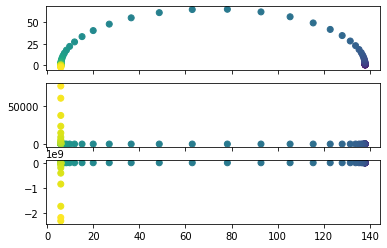

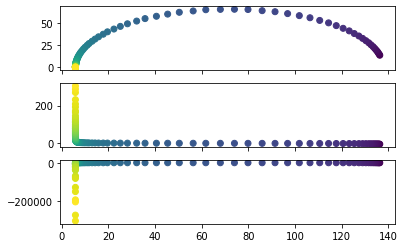

In [105]:

plot_derivatives(eis_data["Z_real"][rand_number], ders1, eis_data["freq"][rand_number])
plot_derivatives(eis_data["Z_real_values"][rand_number], ders2, eis_data["freq_interpolation"][rand_number])

In [106]:
eis_data["Z_real_d1_values"] = eis_data.apply(lambda x: nth_derivatives(x.freq_interpolation, x.Z_real_values, 2)[1], axis=1)    
eis_data["Z_real_d2_values"] = eis_data.apply(lambda x: nth_derivatives(x.freq_interpolation, x.Z_real_values, 2)[2], axis=1)
eis_data["Z_imag_d1_values"] = eis_data.apply(lambda x: nth_derivatives(x.freq_interpolation, x.Z_imag_values, 2)[1], axis=1)    
eis_data["Z_imag_d2_values"] = eis_data.apply(lambda x: nth_derivatives(x.freq_interpolation, x.Z_imag_values, 2)[2], axis=1)


In [107]:
eis_data

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed,freq_interpolation,Z_real_interp,Z_real_values,Z_imag_interp,Z_imag_values,filtered_Z_real,filtered_Z_imag,len_filtered_Z_real,len_filtered_Z_imag,Z_real_d1_values,Z_real_d2_values,Z_imag_d1_values,Z_imag_d2_values
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196,"[0.0024010756884318006, 0.002387371182141883, ...","[0.9964493638297757, 0.9964559871114435, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[63.764380468258295, 61.92539765791979, 60.354...",<scipy.interpolate._interpolate.interp1d objec...,"[-33.297052858722566, -32.290999171821966, -31...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",32,32,"[-1.8861600975547517, -1.6675240532511564, -1....","[0.22424493602348888, 0.27650184902383723, 0.2...","[1.0318630003292202, 0.870470674698993, 0.6144...","[-0.16553268630023987, -0.20410759166978637, -..."
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215,"[0.0024122970939710123, 0.002412250150980291, ...","[0.9965537084667062, 0.9965536249749967, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[342.687444999676, 342.56819878750457, 342.451...",<scipy.interpolate._interpolate.interp1d objec...,"[-2.471435617824892, -2.581873613417865, -2.69...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",35,35,"[-0.12230535593800898, -0.11546228068313531, -...","[0.007018627590070388, 0.006395112059114079, 0...","[-0.11327117326509942, -0.1080351022987712, -0...","[0.005370397194107172, 0.004893305908817585, 0..."
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264,"[0.003297436482895553, 0.003294743257612999, 0...","[0.9964999392686594, 0.99649075164539, 0.99648...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[2878.687101456434, 2860.899522378687, 2841.82...",<scipy.interpolate._interpolate.interp1d objec...,"[-347.6748343957627, -366.32280074381015, -385...","[536.39582077, 492.97868106, 455.63750884, 423...","[-378.67147027, -337.23696196, -301.09112538, ...",12,12,"[-18.24390184613557, -18.02593359302695, -17.7...","[0.22356001330513922, 0.22832462450483076, 0.3...","[-19.12636150185468, -18.576682188678795, -17....","[0.5637807929117157, 0.5729693261877892, 0.875..."
3,"[10.0, 13.4990445, 18.2224203, 24.5985264, 33....","[(930.93345951-0.0068507146j), (930.93327153-0...",L-R-RCPE,"L1: 8.43e-07, R1: 9.06e+01, R2: 8.40e+02, CPE1...","[930.93345951, 930.93327153, 930.93302176, 930...","[-0.0068507146, -0.00910185162, -0.0120927041,...",10.00,199526.231,916.677733,930.933460,-78.835912,-0.006851,"[0.0026020394734222194, 0.0026020394125999763,...","[0.9965542909902029, 0.9965542894765899, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[930.93345951, 930.9334071305063, 930.93334964...",<scipy.i

In [108]:
for i in ["Z_real", "Z_imag","Z_real_d1", "Z_imag_d1","Z_real_d2", "Z_imag_d2"]:
    inter_p_col = f'{i}_values'
    eis_data[f'{inter_p_col}_min'], eis_data[f'{inter_p_col}_Q1'],eis_data[f'{inter_p_col}_median'], eis_data[f'{inter_p_col}_Q3'],eis_data[f'{inter_p_col}_max'] = extract_boxplot_data_from_columns(eis_data[inter_p_col])


/tmp/ipykernel_221/3093879081.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1_sample = np.percentile(cmp, 25, interpolation = 'midpoint')
/tmp/ipykernel_221/3093879081.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1_sample = np.percentile(cmp, 25, interpolation = 'midpoint')
/tmp/ipykernel_221/3093879081.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1_sample = n

In [109]:
eis_data

,freq,Z,Circuit,Parameters,Z_real,Z_imag,freq_min,freq_max,Z_real_min,Z_real_max,Z_imag_min,Z_imag_max,Z_real_minmaxed,Z_imag_minmaxed,freq_interpolation,Z_real_interp,Z_real_values,Z_imag_interp,Z_imag_values,filtered_Z_real,filtered_Z_imag,len_filtered_Z_real,len_filtered_Z_imag,Z_real_d1_values,Z_real_d2_values,Z_imag_d1_values,Z_imag_d2_values,Z_real_values_min,Z_real_values_Q1,Z_real_values_median,Z_real_values_Q3,Z_real_values_max,Z_imag_values_min,Z_imag_values_Q1,Z_imag_values_median,Z_imag_values_Q3,Z_imag_values_max,Z_real_d1_values_min,Z_real_d1_values_Q1,Z_real_d1_values_median,Z_real_d1_values_Q3,Z_real_d1_values_max,Z_imag_d1_values_min,Z_imag_d1_values_Q1,Z_imag_d1_values_median,Z_imag_d1_values_Q3,Z_imag_d1_values_max,Z_real_d2_values_min,Z_real_d2_values_Q1,Z_real_d2_values_median,Z_real_d2_values_Q3,Z_real_d2_values_max,Z_imag_d2_values_min,Z_imag_d2_values_Q1,Z_imag_d2_values_median,Z_imag_d2_values_Q3,Z_imag_d2_values_max
0,"[0.1, 0.148398179, 0.220220195, 0.326802759, 0...","[(309.82561192-156.06088233j), (267.46983919-1...",L-R-RCPE-RCPE-RCPE,"L1: 2.94e-08, R1: 4.51e+00, R2: 5.19e-02, CPE1...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",0.10,100000.000,4.802034,309.825612,-156.060882,-0.369196,"[0.0024010756884318006, 0.002387371182141883, ...","[0.9964493638297757, 0.9964559871114435, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[63.764380468258295, 61.92539765791979, 60.354...",<scipy.interpolate._interpolate.interp1d objec...,"[-33.297052858722566, -32.290999171821966, -31...","[309.82561192, 267.46983919, 229.38061493, 196...","[-156.06088233, -146.21033646, -133.4855237, -...",32,32,"[-1.8861600975547517, -1.6675240532511564, -1....","[0.22424493602348888, 0.27650184902383723, 0.2...","[1.0318630003292202, 0.870470674698993, 0.6144...","[-0.16553268630023987, -0.20410759166978637, -...",4.802034,5.604402,9.583239,28.116231,63.764380,-33.297053,-20.128008,-6.929360,-1.634002,-0.369196,-1.886160,-0.130880,-0.003106,-0.000061,-0.000002,0.000003,0.000094,0.003640,0.058717,1.031863,-7.804138e-17,3.435396e-09,2.065370e-06,1.333732e-03,2.765018e-01,-2.041076e-01,-3.481132e-04,-2.314654e-06,-5.278067e-09,3.510786e-18
1,"[1.0, 1.34339933, 1.80472177, 2.42446202, 3.25...","[(344.50700012-0.87321496j), (344.36191597-0.9...",RC-RC-RCPE-RCPE,"R1: 2.08e+02, R2: 2.50e+01, R3: 9.57e+01, R4: ...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",1.00,100000.000,230.202174,344.507000,-43.334151,-0.873215,"[0.0024122970939710123, 0.002412250150980291, ...","[0.9965537084667062, 0.9965536249749967, 0.996...","[10.0, 10.974987654930562, 12.045035402587823,...",<scipy.interpolate._interpolate.interp1d objec...,"[342.687444999676, 342.56819878750457, 342.451...",<scipy.interpolate._interpolate.interp1d objec...,"[-2.471435617824892, -2.581873613417865, -2.69...","[344.50700012, 344.36191597, 344.19647198, 344...","[-0.87321496, -0.99738889, -1.13909869, -1.300...",35,35,"[-0.12230535593800898, -0.11546228068313531, -...","[0.007018627590070388, 0.006395112059114079, 0...","[-0.11327117326509942, -0.1080351022987712, -0...","[0.005370397194107172, 0.004893305908817585, 0...",230.202174,245.869948,315.751805,338.062105,342.687445,-43.311015,-30.035136,-17.989857,-7.941195,-2.471436,-0.122305,-0.032914,-0.023861,-0.001353,-0.000086,-0.113271,-0.047969,-0.016364,0.000137,0.002953,-3.688837e-06,3.553766e-08,3.262345e-06,1.543524e-04,7.018628e-03,-4.320037e-07,-4.761695e-09,1.775677e-05,1.239998e-04,5.370397e-03
2,"[1.0, 1.26360956, 1.59670912, 2.01761691, 2.54...","[(3080.15920083-80.84202473j), (3071.83539583-...",L-R-RCPE-RCPE-RCPE,"L1: 3.35e-08, R1: 6.95e+01, R2: 7.49e+01, CPE1...","[3080.15920083, 3071.83539583, 3061.93812951, ...","[-80.84202473, -94.50641483, -110.36642266, -1...",1.00,1995262.310,146.222822,3080.159201,-860.278825,-4.597264,"

Se intentó por
    